In [235]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [236]:
df = pd.read_excel('forecasting_case_study.xlsx')

In [237]:
df.head()

,region,Post-Shipment Invoice Date,Customer Code,Technology,SAP Item Code,Qty(Net),SO Date,End Customer Code,plant
0,reg_1,2015-12-08,cc_1,t_1,sku_1,50.0,2015-12-07,ec_1,p1
1,reg_2,2015-12-08,cc_2,t_2,sku_2,15.0,2015-12-07,ec_2,p1
2,reg_3,2015-11-23,cc_3,t_2,sku_3,15.0,2015-12-09,ec_3,p2
3,reg_3,2015-12-10,cc_4,t_2,sku_3,30.0,2015-12-10,ec_4,p2
4,reg_4,2015-12-03,cc_5,t_3,sku_4,50.0,2015-12-09,ec_5,p2


In [238]:
df['region'].value_counts()

reg_3     2989
reg_5      759
reg_9      545
reg_2      326
reg_8      322
reg_4      206
reg_1      193
reg_7      175
reg_16     152
reg_17     120
reg_11     120
reg_13     118
reg_10     107
reg_23     101
reg_6       65
reg_21      64
reg_19      59
reg_14      44
reg_12      35
reg_22      29
reg_20      23
reg_18      10
reg_15       3
reg_24       1
Name: region, dtype: int64

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6566 entries, 0 to 6565
Data columns (total 9 columns):
region                        6566 non-null object
Post-Shipment Invoice Date    6521 non-null datetime64[ns]
Customer Code                 6566 non-null object
Technology                    6566 non-null object
SAP Item Code                 6566 non-null object
Qty(Net)                      6566 non-null float64
SO Date                       6566 non-null datetime64[ns]
End Customer Code             6566 non-null object
plant                         6566 non-null object
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 461.8+ KB


In [215]:
type(df['SO Date'])

pandas.core.series.Series

In [216]:
df.columns

Index(['region', 'Post-Shipment Invoice Date', 'Customer Code', 'Technology',
       'SAP Item Code', 'Qty(Net)', 'SO Date', 'End Customer Code', 'plant'],
      dtype='object')

In [217]:
df = df.dropna(axis = 1)

In [218]:
df.head(10)

,region,Customer Code,Technology,SAP Item Code,Qty(Net),SO Date,End Customer Code,plant
0,reg_1,cc_1,t_1,sku_1,50.0,2015-12-07,ec_1,p1
1,reg_2,cc_2,t_2,sku_2,15.0,2015-12-07,ec_2,p1
2,reg_3,cc_3,t_2,sku_3,15.0,2015-12-09,ec_3,p2
3,reg_3,cc_4,t_2,sku_3,30.0,2015-12-10,ec_4,p2
4,reg_4,cc_5,t_3,sku_4,50.0,2015-12-09,ec_5,p2
5,reg_5,cc_6,t_3,sku_5,10.0,2015-12-08,ec_6,p2
6,reg_3,cc_7,t_4,sku_6,20.0,2015-12-08,ec_7,p2
7,reg_5,cc_8,t_3,sku_7,20.0,2015-12-08,ec_8,p2
8,reg_3,cc_9,t_2,sku_3,15.0,2015-12-08,ec_9,p2
9,reg_6,cc_10,t_2,sku_8,105.0,2015-12-08,ec_10,p1


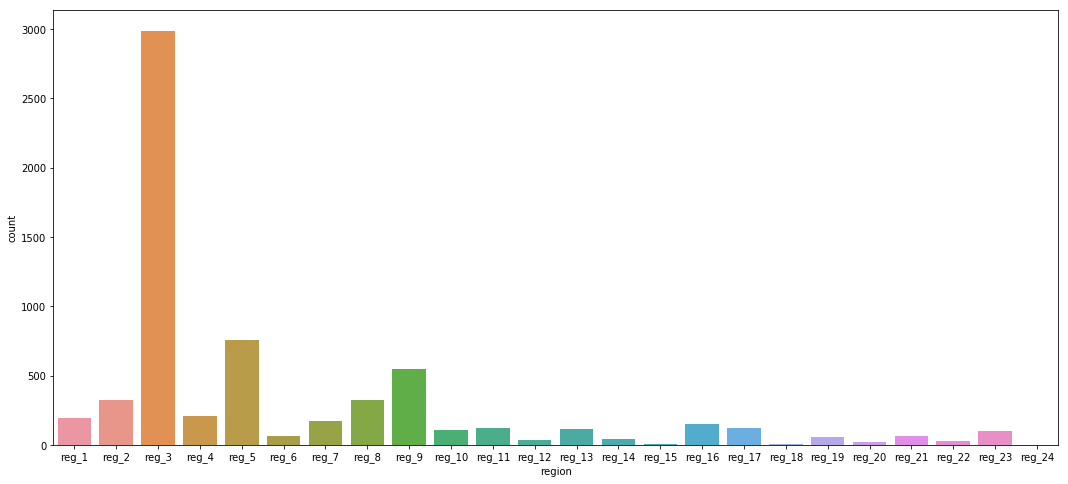

In [219]:
sns.countplot(x="region", data = df)

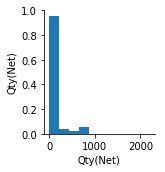

In [220]:
sns.pairplot(df)

In [221]:
df = df.set_index('SO Date')
df.index

DatetimeIndex(['2015-12-07', '2015-12-07', '2015-12-09', '2015-12-10',
               '2015-12-09', '2015-12-08', '2015-12-08', '2015-12-08',
               '2015-12-08', '2015-12-08',
               ...
               '2018-10-12', '2018-10-01', '2018-07-24', '2018-07-24',
               '2018-10-04', '2018-10-04', '2018-10-04', '2018-09-28',
               '2018-10-09', '2018-10-15'],
              dtype='datetime64[ns]', name='SO Date', length=6566, freq=None)

In [222]:
df = df.sort_values('SO Date')

In [223]:
y = df['Qty(Net)'].resample('MS').mean()

In [224]:
y['2015':]

SO Date
2015-12-01    102.447761
2016-01-01    103.550847
2016-02-01     96.327044
2016-03-01    126.796209
2016-04-01     78.173913
2016-05-01    126.878453
2016-06-01    108.767196
2016-07-01    204.223404
2016-08-01     79.272727
2016-09-01    101.283133
2016-10-01    118.992806
2016-11-01     56.585366
2016-12-01    116.813793
2017-01-01    125.558036
2017-02-01    171.580247
2017-03-01    183.367893
2017-04-01    123.736111
2017-05-01     68.065089
2017-06-01    129.487013
2017-07-01     81.687764
2017-08-01    103.023256
2017-09-01     93.169697
2017-10-01    119.921757
2017-11-01     89.492857
2017-12-01    133.068571
2018-01-01    120.716279
2018-02-01    134.796992
2018-03-01    128.059113
2018-04-01    104.802030
2018-05-01    146.274262
2018-06-01    242.674699
2018-07-01    100.973262
2018-08-01     97.286585
2018-09-01     54.730769
2018-10-01     53.585185
2018-11-01     75.420000
Freq: MS, Name: Qty(Net), dtype: float64

In [234]:
df.head()

,region,Customer Code,Technology,SAP Item Code,Qty(Net),End Customer Code,plant
SO Date,,,,,,,
2015-12-01,reg_12,cc_68,t_2,sku_24,300.0,ec_71,p1
2015-12-07,reg_1,cc_1,t_1,sku_1,50.0,ec_1,p1
2015-12-07,reg_3,cc_19,t_2,sku_62,180.0,ec_19,p2
2015-12-07,reg_3,cc_19,t_2,sku_62,165.0,ec_19,p2
2015-12-07,reg_3,cc_19,t_2,sku_62,180.0,ec_19,p2


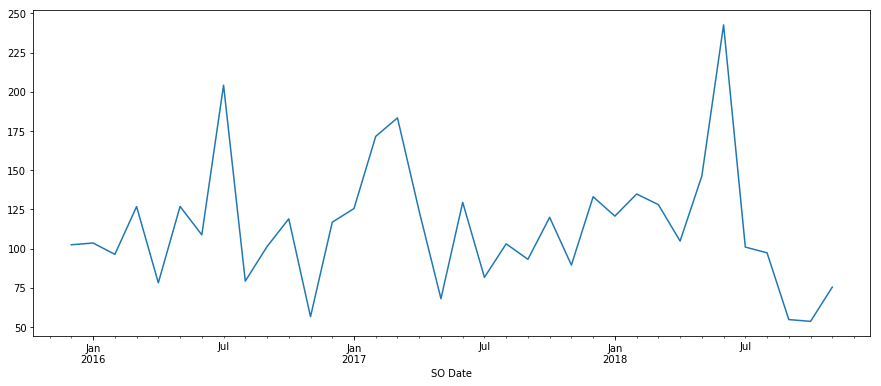

In [225]:
y.plot(figsize=(15, 6))
plt.show()

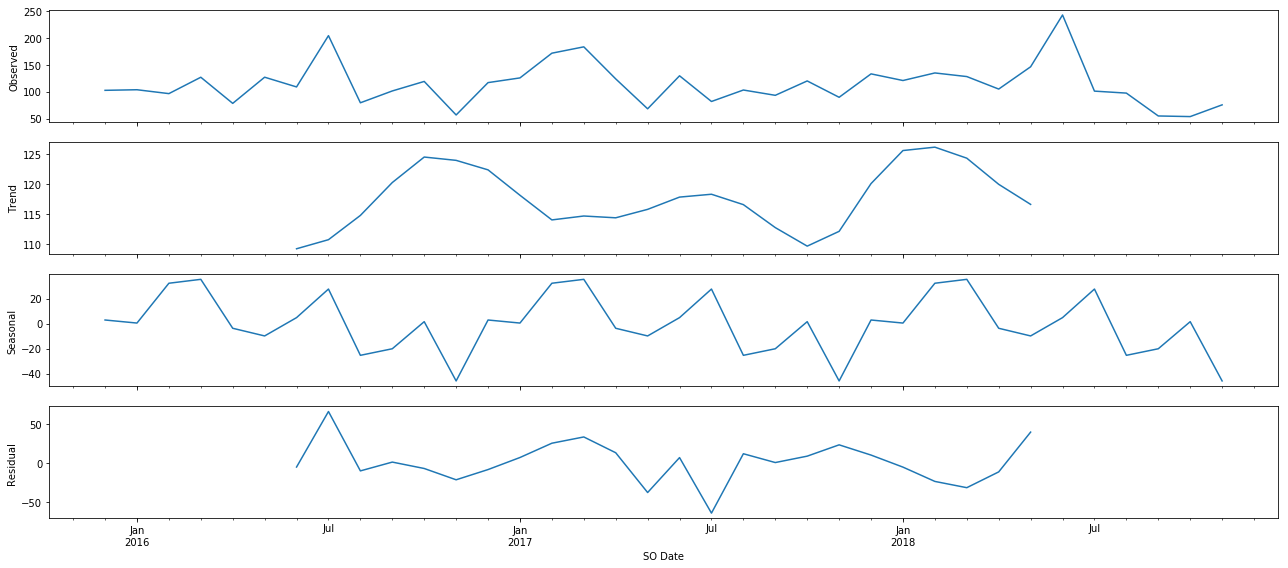

In [226]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [228]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [229]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results = mod.fit()
print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

IndentationError: unexpected unindent (<ipython-input-229-b09dc1f80d40>, line 9)

In [230]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0983      0.380      0.258      0.796      -0.647       0.844
ma.L1          1.0000      0.779      1.284      0.199      -0.527       2.527
ar.S.L12       0.0911      0.064      1.418      0.156      -0.035       0.217
sigma2      1291.4492      0.001   2.14e+06      0.000    1291.448    1291.450


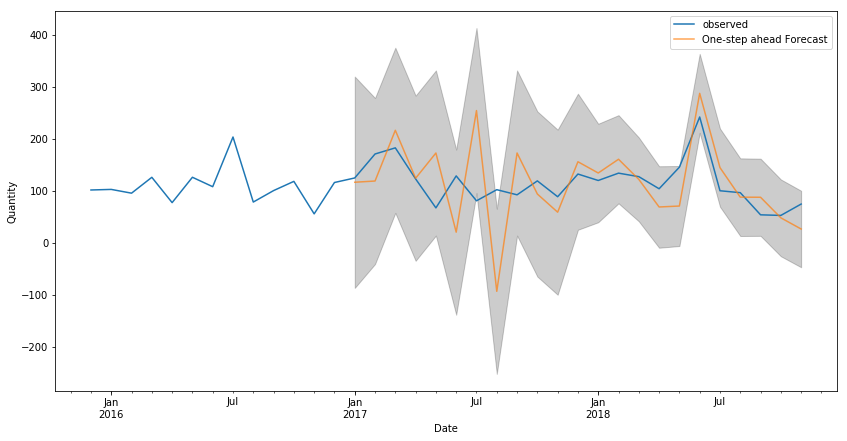

In [233]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Quantity')
plt.legend()
plt.show()

In [ ]:
X = df.iloc[:, df.columns != 'Qty(Net)'].values
Y = df.iloc[:, 5].values

In [92]:
from sklearn.preprocessing import LabelEncoder#Now let's import encoder from sklearn library
LE = LabelEncoder()

In [102]:
df = df.apply(LE.fit_transform)#Here we applied encoder onto data

C:\Users\DELL\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:285: FutureWarning: In the future, NAT != NAT will be True rather than False.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


In [103]:
df.region = pd.to_numeric(df.region)

In [104]:
df.head()

,region,Post-Shipment Invoice Date,Customer Code,Technology,SAP Item Code,Qty(Net),SO Date,End Customer Code,plant
0,0,6,0,0,0,25,1,0,0
1,11,6,111,7,111,16,1,111,0
2,17,2,222,7,134,16,3,222,1
3,17,8,284,7,134,20,4,333,1
4,18,4,295,8,145,25,3,375,1
